In [1]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split

In [4]:
df = pd.read_csv('insurance_data.csv')
df.head()

,age,sex,bmi,children,smoker,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary,region,charges
0,18.0,male,23.21,0.0,no,29087.54313,17.0,715428.0,4720920.992,0.0,55784970.05,southeast,1121.8739
1,18.0,male,30.14,0.0,no,39053.67437,7.0,699157.0,4329831.676,0.0,13700885.19,southeast,1131.5066
2,18.0,male,33.33,0.0,no,39023.62759,19.0,702341.0,6884860.774,0.0,73523107.27,southeast,1135.9407
3,18.0,male,33.66,0.0,no,28185.39332,11.0,700250.0,4274773.550,0.0,75819679.60,southeast,1136.3994
4,18.0,male,34.10,0.0,no,14697.85941,16.0,711584.0,3787293.921,0.0,23012320.01,southeast,1137.0110


In [5]:
df.shape

(1338, 13)

In [6]:
df.describe()

,age,bmi,children,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary,charges
count,1329.000000,1335.000000,1333.000000,1324.000000,1332.000000,1.335000e+03,1.334000e+03,1336.000000,1.332000e+03,1338.000000
mean,39.310008,30.665112,1.090773,33361.327180,15.216216,9.100047e+05,1.584179e+07,1.060629,3.696849e+08,13270.422265
std,14.034818,6.101690,1.201856,15617.288337,7.467723,9.188612e+04,2.669305e+07,0.533583,5.668843e+08,12110.011237
min,18.000000,15.960000,0.000000,1920.136268,1.000000,6.954300e+05,2.945253e+04,0.000000,2.747072e+06,1121.873900
25%,27.000000,26.302500,0.000000,20768.860390,9.000000,8.471995e+05,4.077633e+06,1.000000,7.701932e+07,4740.287150
50%,39.000000,30.400000,1.000000,33700.310675,15.000000,9.143000e+05,7.490337e+06,1.000000,1.419361e+08,9382.033000
75%,51.000000,34.687500,2.000000,45052.331957,20.000000,9.716840e+05,1.084082e+07,1.000000,3.243499e+08,16639.912515
max,64.000000,53.130000,5.000000,77277.988480,40.000000,1.107872e+06,2.616317e+08,3.000000,4.117197e+09,63770.428010


In [7]:
df.isnull().sum()

age                                 9
sex                                 0
bmi                                 3
children                            5
smoker                              0
Claim_Amount                       14
past_consultations                  6
num_of_steps                        3
Hospital_expenditure                4
NUmber_of_past_hospitalizations     2
Anual_Salary                        6
region                              0
charges                             0
dtype: int64

In [8]:
df.duplicated().sum()

np.int64(0)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 13 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   age                              1329 non-null   float64
 1   sex                              1338 non-null   object 
 2   bmi                              1335 non-null   float64
 3   children                         1333 non-null   float64
 4   smoker                           1338 non-null   object 
 5   Claim_Amount                     1324 non-null   float64
 6   past_consultations               1332 non-null   float64
 7   num_of_steps                     1335 non-null   float64
 8   Hospital_expenditure             1334 non-null   float64
 9   NUmber_of_past_hospitalizations  1336 non-null   float64
 10  Anual_Salary                     1332 non-null   float64
 11  region                           1338 non-null   object 
 12  charges             

In [10]:
df['smoker'].unique()

array(['no', 'yes'], dtype=object)

In [11]:
df.isnull().sum().sum()

np.int64(52)

In [12]:
df['smoker'].value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

In [13]:
#numerical column repalce it with mean 
# for categorical use mode as fill
for i in df.columns:
    if df[i].dtype == 'object':
        df[i].fillna(df[i].mode()[0],inplace=True)
    else:
        df[i].fillna(df[i].mean(),inplace=True)

C:\Users\islov\AppData\Local\Temp\ipykernel_7404\400817789.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[i].fillna(df[i].mean(),inplace=True)
C:\Users\islov\AppData\Local\Temp\ipykernel_7404\400817789.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when do

In [14]:
df.isnull().sum()

age                                0
sex                                0
bmi                                0
children                           0
smoker                             0
Claim_Amount                       0
past_consultations                 0
num_of_steps                       0
Hospital_expenditure               0
NUmber_of_past_hospitalizations    0
Anual_Salary                       0
region                             0
charges                            0
dtype: int64

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 13 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   age                              1338 non-null   float64
 1   sex                              1338 non-null   object 
 2   bmi                              1338 non-null   float64
 3   children                         1338 non-null   float64
 4   smoker                           1338 non-null   object 
 5   Claim_Amount                     1338 non-null   float64
 6   past_consultations               1338 non-null   float64
 7   num_of_steps                     1338 non-null   float64
 8   Hospital_expenditure             1338 non-null   float64
 9   NUmber_of_past_hospitalizations  1338 non-null   float64
 10  Anual_Salary                     1338 non-null   float64
 11  region                           1338 non-null   object 
 12  charges             

In [32]:
col_list = []
for i in df.columns:
    if df[i].dtype != 'object':
        if i != 'charges':
            col_list.append(i)

col_list

['age',
 'bmi',
 'children',
 'Claim_Amount',
 'past_consultations',
 'num_of_steps',
 'Hospital_expenditure',
 'NUmber_of_past_hospitalizations',
 'Anual_Salary']

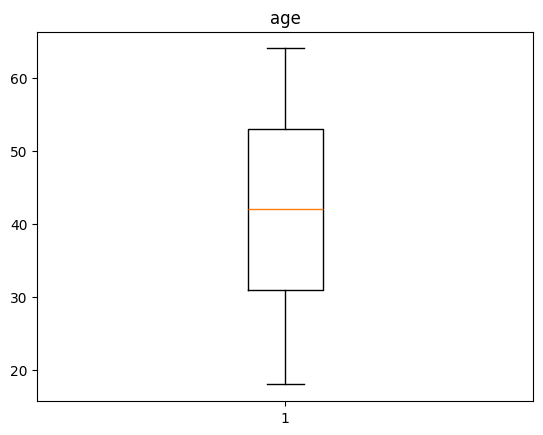

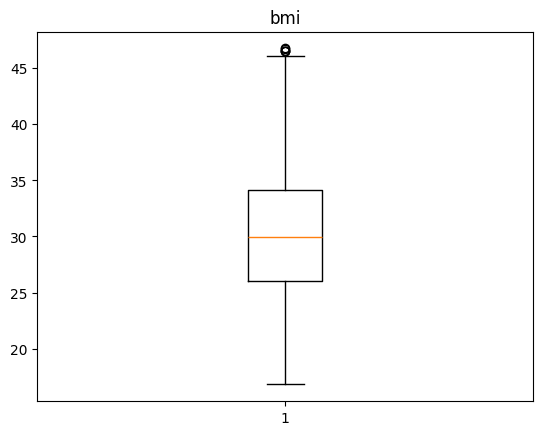

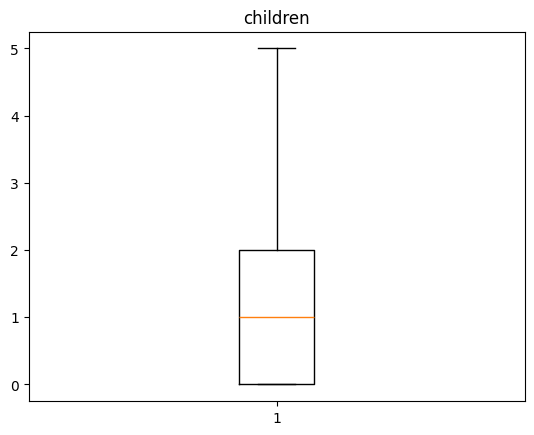

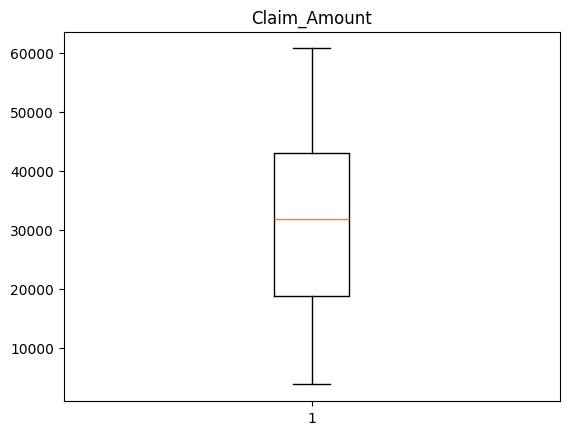

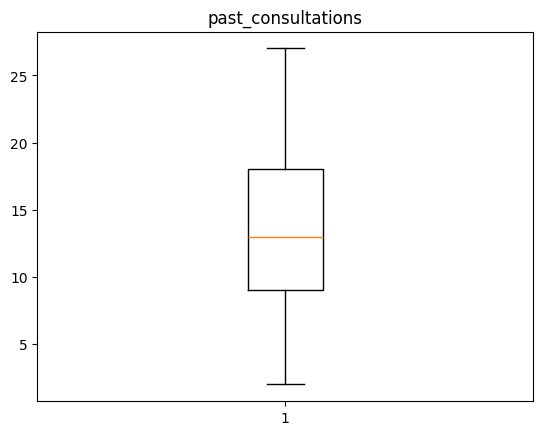

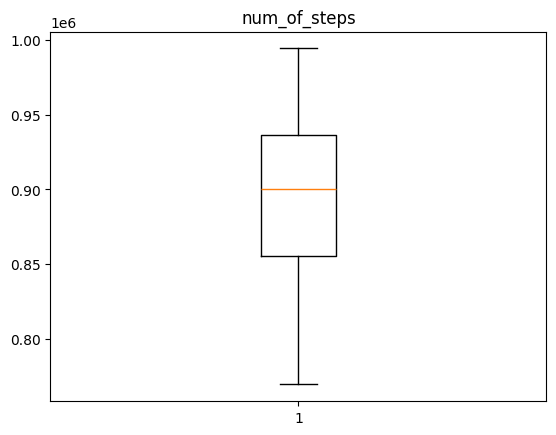

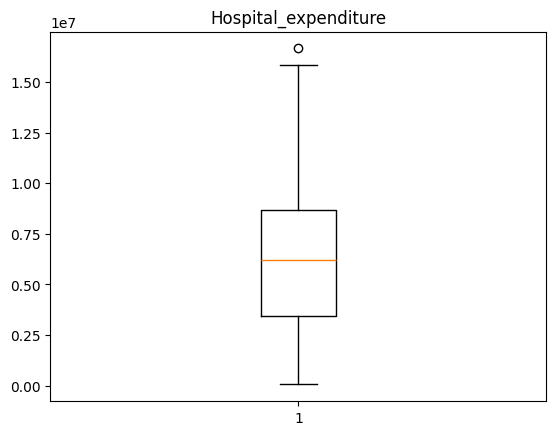

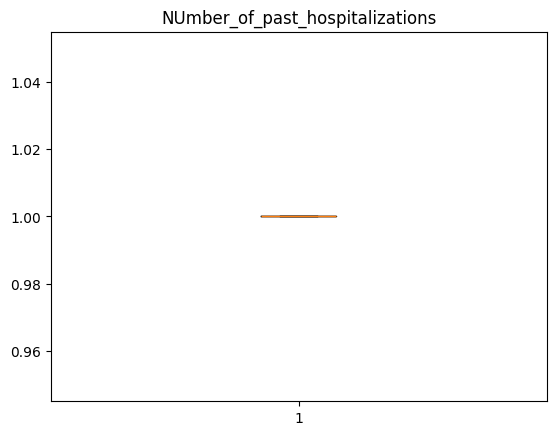

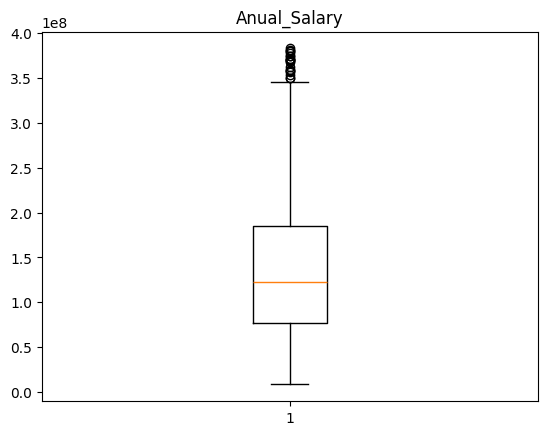

In [33]:
for i in col_list:
    plt.boxplot(df[i])
    plt.title(i)
    plt.show()

In [34]:
for i in col_list:
    q3 = df[i].quantile(0.75)
    q1 = df[i].quantile(0.25)
    iqr = q3 - q1
    LB = q1 - 1.5*iqr
    UB = q3 + 1.5* iqr
    df = df[(df[i] >= LB) & (df[i] <= UB)]

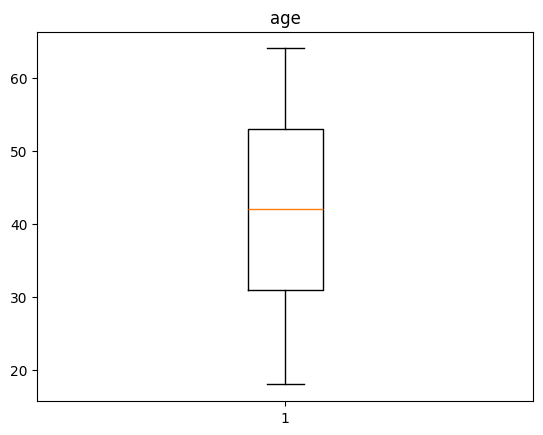

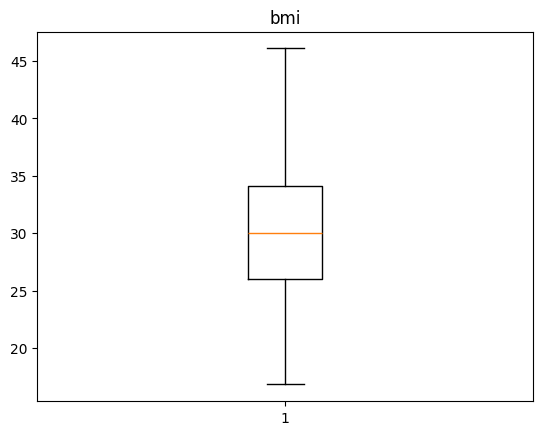

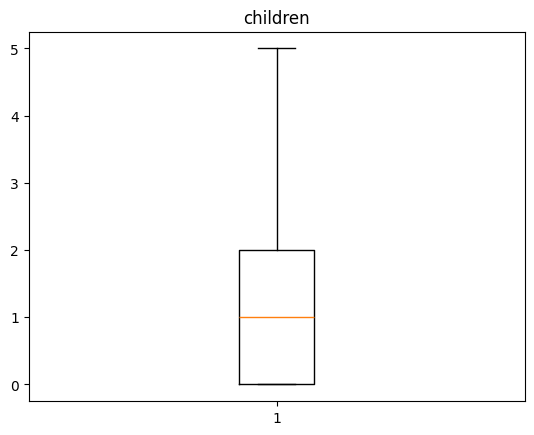

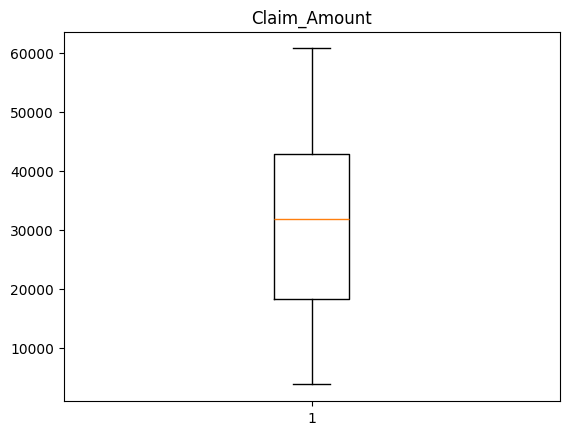

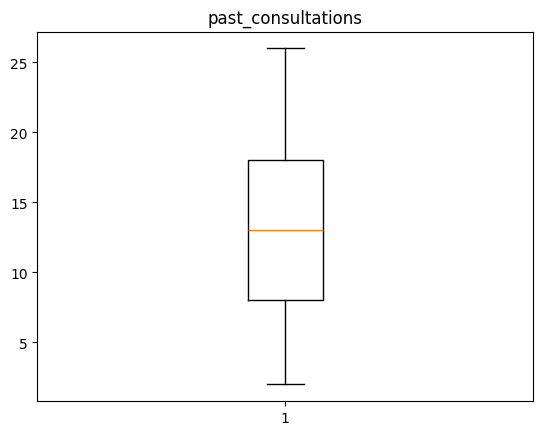

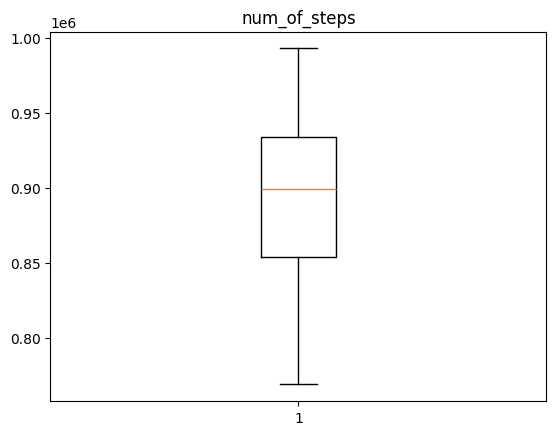

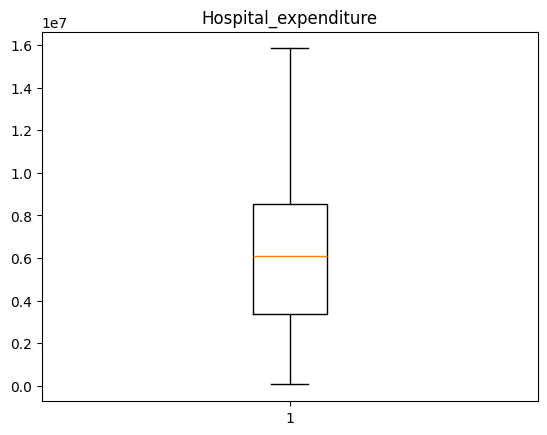

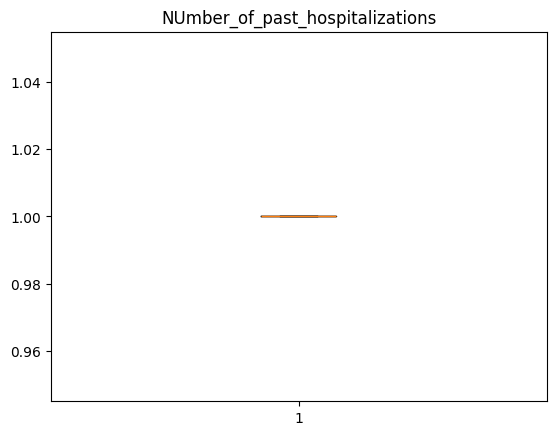

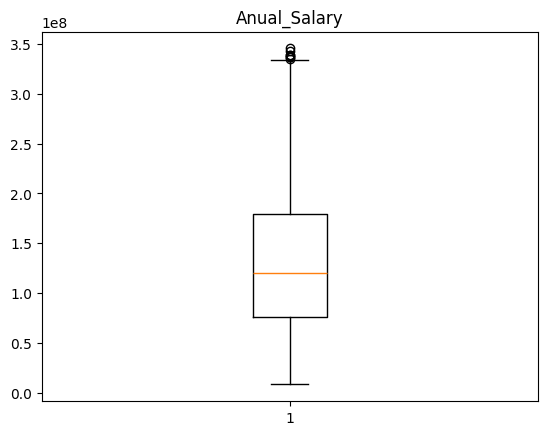

In [35]:
for i in col_list:
    plt.boxplot(df[i])
    plt.title(i)
    plt.show()

In [18]:
#Feature Selection
#VIF : variance inflation factor
#vif helps us to detect the multicolinearity among the columns. 
# If your vif > = 6 it means that column is not important for us, as it having high multicolinearity.
#We will remove those values from dataset.
#how do we find VIF?


In [36]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [37]:
dummy = df[col_list]
dummy

,age,bmi,children,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary
151,25.0,27.550,0.0,39148.95495,10.0,780652.0,8.614147e+06,1.0,5.452601e+07
152,22.0,20.235,0.0,41547.52536,13.0,802627.0,2.491594e+05,1.0,1.671847e+07
153,25.0,35.625,0.0,39660.60193,12.0,770773.0,3.043323e+06,1.0,4.852694e+07
154,20.0,31.130,2.0,16032.87148,7.0,769255.0,1.599069e+06,1.0,2.441262e+07
155,21.0,17.400,1.0,31090.98977,21.0,778769.0,3.015365e+06,1.0,5.853579e+07
...,...,...,...,...,...,...,...,...,...
1018,32.0,23.650,1.0,53840.22825,18.0,977689.0,7.081732e+06,1.0,3.390847e+08
1019,28.0,23.980,3.0,41686.19886,12.0,974518.0,8.679934e+06,1.0,3.225795e+08
1021,25.0,41.325,0.0,17100.29000,26.0,970038.0,8.933072e+06,1.0,3.353376e+08
1024,21.0,25.700,4.0,23327.30277,14.0,974525.0,8.800807e+06,1.0,3.333838e+08


In [38]:
pd.DataFrame(dummy)

,age,bmi,children,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary
151,25.0,27.550,0.0,39148.95495,10.0,780652.0,8.614147e+06,1.0,5.452601e+07
152,22.0,20.235,0.0,41547.52536,13.0,802627.0,2.491594e+05,1.0,1.671847e+07
153,25.0,35.625,0.0,39660.60193,12.0,770773.0,3.043323e+06,1.0,4.852694e+07
154,20.0,31.130,2.0,16032.87148,7.0,769255.0,1.599069e+06,1.0,2.441262e+07
155,21.0,17.400,1.0,31090.98977,21.0,778769.0,3.015365e+06,1.0,5.853579e+07
...,...,...,...,...,...,...,...,...,...
1018,32.0,23.650,1.0,53840.22825,18.0,977689.0,7.081732e+06,1.0,3.390847e+08
1019,28.0,23.980,3.0,41686.19886,12.0,974518.0,8.679934e+06,1.0,3.225795e+08
1021,25.0,41.325,0.0,17100.29000,26.0,970038.0,8.933072e+06,1.0,3.353376e+08
1024,21.0,25.700,4.0,23327.30277,14.0,974525.0,8.800807e+06,1.0,3.333838e+08


In [39]:
vif_data = pd.DataFrame()
vif_data['Feature'] = dummy.columns #in this feature column we are having all the independent numerical columns of our actual dataframe
vif_data

,Feature
0,age
1,bmi
2,children
3,Claim_Amount
4,past_consultations
5,num_of_steps
6,Hospital_expenditure
7,NUmber_of_past_hospitalizations
8,Anual_Salary


In [40]:
vif_list = []
for i in range(len(dummy.columns)):
    vif = variance_inflation_factor(dummy.values,i) # i will be the column index
    vif_list.append(vif)

vif_data['VIF'] = vif_list

In [41]:
vif_data

,Feature,VIF
0,age,2.446381
1,bmi,1.050618
2,children,1.088292
3,Claim_Amount,1.034099
4,past_consultations,1.063920
5,num_of_steps,5.595981
6,Hospital_expenditure,1.107565
7,NUmber_of_past_hospitalizations,1394.518728
8,Anual_Salary,3.537946


In [43]:
#NUmber_of_past_hospitalizations columns is having a lot of VIF which is
#affecting the other columns so we will drop them and again will count the VIF

In [42]:
df = df.drop(['NUmber_of_past_hospitalizations'],axis= 1)

In [44]:
col_list = []
for i in df.columns:
    if df[i].dtype != 'object' and i != 'charges':
        col_list.append(i)

col_list
#NUmber_of_past_hospitalizations column is not in original data.

['age',
 'bmi',
 'children',
 'Claim_Amount',
 'past_consultations',
 'num_of_steps',
 'Hospital_expenditure',
 'Anual_Salary']

In [45]:
#2nd time calculating VIF without NUmber_of_past_hospitalizations column
dummy = df[col_list]
vif_data = pd.DataFrame()
vif_data['Feature']= col_list
vif_list  = []
for i in range(len(dummy.columns)):
    vif = variance_inflation_factor(dummy.values,i)
    vif_list.append(vif)

vif_data['VIF'] = vif_list

In [46]:
vif_data
#now num_of_steps column is having VIF> 6 so we need to drop it.
#Even though there are other columns exit which are having VIF more than 6 but
#they are significantly lesser then num_of_stpes column
#because VIF of num_of_steps column is higher that is why it is increasing the VIF of other column
#This what we say Multicolinearity in Machine Learning Terms.

,Feature,VIF
0,age,18.920383
1,bmi,27.580795
2,children,2.079154
3,Claim_Amount,5.778592
4,past_consultations,6.389282
5,num_of_steps,58.850418
6,Hospital_expenditure,5.208874
7,Anual_Salary,6.760386


In [47]:
df = df.drop(columns='num_of_steps')

In [49]:
#third time calculating VIF without num_of_steps colum
col_list = []
for i in df.columns:
    if df[i].dtype != 'object' and i != 'charges':
        col_list.append(i)
        
dummy = df[col_list]
vif_data = pd.DataFrame()
vif_data['Feature']= col_list
vif_list  = []
for i in range(len(dummy.columns)):
    vif = variance_inflation_factor(dummy.values,i)
    vif_list.append(vif)

vif_data['VIF'] = vif_list

In [51]:
vif_data
#Now the age and bmi column is having VIF more than 6
#so we need to remove them

,Feature,VIF
0,age,15.861341
1,bmi,14.825377
2,children,1.946926
3,Claim_Amount,5.224344
4,past_consultations,5.937966
5,Hospital_expenditure,4.936923
6,Anual_Salary,6.622273


In [52]:
df = df.drop(columns='bmi')
df = df.drop(columns='age')


In [54]:
#fourth time calculating VIF without bmi and age column
col_list = []
for i in df.columns:
    if df[i].dtype != 'object' and i != 'charges':
        col_list.append(i)
dummy = df[col_list]
vif_data = pd.DataFrame()
vif_data['Feature']= col_list
vif_list  = []
for i in range(len(dummy.columns)):
    vif = variance_inflation_factor(dummy.values,i)
    vif_list.append(vif)

vif_data['VIF'] = vif_list

In [56]:
vif_data
#Now the VIF is the existing column is less then 6 
#Means these are the columns which are not corelated 
#Using these column we will be predicting the charges

#i know that we removed 4 precious columns of our data 
#but because they were highly corelated so they will be creating burden for model to learn.
#That is why we removed them

,Feature,VIF
0,children,1.823419
1,Claim_Amount,4.302974
2,past_consultations,4.972613
3,Hospital_expenditure,4.371056
4,Anual_Salary,4.944862


In [57]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [58]:
for i in df.columns:
    if df[i].dtype == 'object':
        df[i] = le.fit_transform(df[i])

In [59]:
df

,sex,children,smoker,Claim_Amount,past_consultations,Hospital_expenditure,Anual_Salary,region,charges
151,1,0.0,0,39148.95495,10.0,8.614147e+06,5.452601e+07,1,2523.16950
152,0,0.0,0,41547.52536,13.0,2.491594e+05,1.671847e+07,1,2527.81865
153,1,0.0,0,39660.60193,12.0,3.043323e+06,4.852694e+07,1,2534.39375
154,1,2.0,0,16032.87148,7.0,1.599069e+06,2.441262e+07,2,2566.47070
155,0,1.0,0,31090.98977,21.0,3.015365e+06,5.853579e+07,3,2585.26900
...,...,...,...,...,...,...,...,...,...
1018,0,1.0,0,53840.22825,18.0,7.081732e+06,3.390847e+08,2,17626.23951
1019,1,3.0,1,41686.19886,12.0,8.679934e+06,3.225795e+08,2,17663.14420
1021,0,0.0,0,17100.29000,26.0,8.933072e+06,3.353376e+08,0,17878.90068
1024,1,4.0,1,23327.30277,14.0,8.800807e+06,3.333838e+08,3,17942.10600


In [60]:
from sklearn.model_selection import train_test_split

In [61]:
x = df.iloc[:,:8]#independent variable
y = df.iloc[:,-1]#dependent variable

In [62]:
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.8, random_state = 42)

In [63]:
x_train

,sex,children,smoker,Claim_Amount,past_consultations,Hospital_expenditure,Anual_Salary,region
948,0,3.0,0,48223.172550,7.0,4.299587e+06,2.068307e+08,2
253,1,0.0,0,8026.736902,18.0,5.516399e+06,6.014712e+07,0
950,0,3.0,0,10741.271460,24.0,1.132432e+07,2.185752e+08,3
686,0,0.0,0,36390.328760,9.0,9.881047e+06,1.230031e+08,3
585,0,1.0,0,28468.978370,13.0,6.508521e+06,1.191427e+08,2
...,...,...,...,...,...,...,...,...
223,0,1.0,0,22618.344800,4.0,9.464551e+06,2.142672e+07,2
258,1,3.0,0,17845.503380,7.0,8.606625e+06,8.551357e+07,3
423,1,0.0,0,36424.732040,16.0,3.652798e+06,8.938486e+07,3
590,0,0.0,0,11243.130860,8.0,5.579773e+06,1.307232e+08,3


In [64]:
y_train.shape

(684,)

In [65]:
x_test.shape

(171, 8)

In [66]:
y_test.shape

(171,)

In [67]:
x_train.shape

(684, 8)

In [68]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train,y_train)


LinearRegression()

In [69]:
y_pred=model.predict(x_test)
y_pred

array([ 6704.87882025,  8859.2273459 ,  7594.29761845,  6576.24435273,
       12618.06290932, 10432.50469246,  7597.39287722,  6445.21784865,
        8915.09183842, 15835.3260757 , 10889.41845084, 11712.60237817,
       13578.31544039,  8328.60174497,  4234.97584599,  8122.35018922,
        6950.57772953, 10708.67163275,  9296.71747524, 16133.10247652,
        5161.61929639,  7017.6240444 ,  6943.84177999,  8285.9398568 ,
       15853.54500722, 15357.2139576 , 14703.53208135,  9522.44012335,
        6270.93780156, 12434.47109319,  8911.31564247,  7104.92420933,
        6684.46811605,  9623.67123382,  6810.73869378,  7281.31128231,
        7389.52603688, 10554.40585242,  3072.29611209, 11540.30537896,
        2814.67141463,  9306.18481517,  6927.15800478,  5422.23430644,
        6088.57812058,  7898.04171594,  7207.87028301, 15767.64292737,
        9169.52606672, 10841.30594528,  8552.88061565,  8590.26883412,
        6145.81659863, 16879.02503371,  6284.13492064, 11288.88243026,
      

In [70]:
error = pd.DataFrame(columns=['Actual values','Predicted values'])
error

,Actual values,Predicted values


In [73]:
error['Actual values'] = y_test
error['Predicted values'] = y_pred

In [74]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test,y_pred)
rsme = np.sqrt(mse)
rsme

np.float64(1589.665175604567)

In [82]:
r2_score(y_test,r_pred)

0.8238057884341936

In [81]:
r_score = r2_score(y_test,y_pred)
r_score

0.8237367347444755

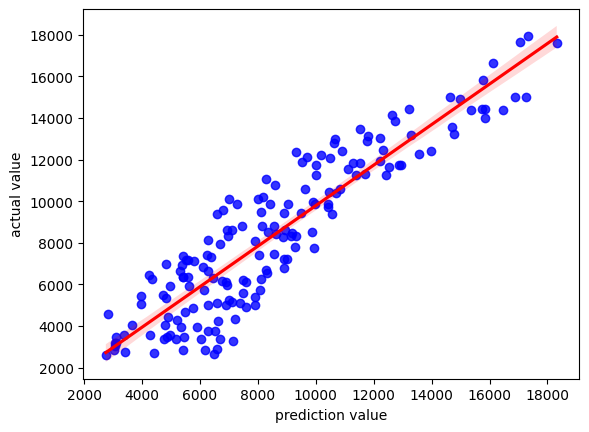

In [76]:
sns.regplot(x=y_pred,y=y_test,line_kws={'color':'red'},color='blue')
plt.xlabel('prediction value')
plt.ylabel('actual value')
plt.show()